<a href="https://colab.research.google.com/github/Achraf8EL/Analyse-des-Donn-es-M1/blob/main/TD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#1. Create a random array x with 100 elements.
type(np.random.rand(100, 1))

numpy.ndarray

In [ ]:
X=np.random.rand(100, 1)

In [ ]:
gaussian_scale=0.4
y = 3 * X[:, 0] + 2 + np.random.randn(100) * gaussian_scale

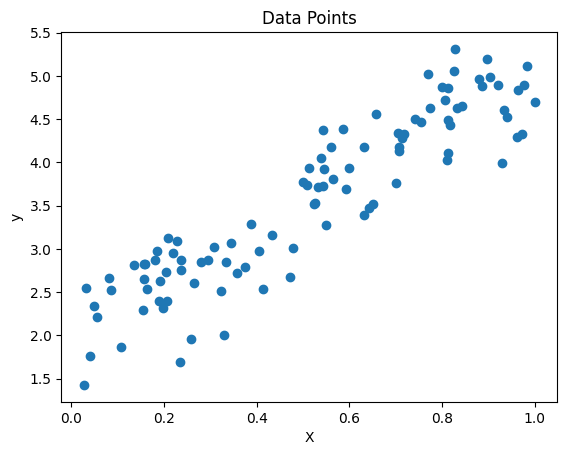

In [ ]:
#Plot data points
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Points')
plt.show()

In [ ]:
#4. Split the data into training and testing sets with train test split from sklearn.model selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#5. Fit a linear regression model using sklearn.linear model.LinearRegression.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Evaluate and Interpret the Results


In [ ]:
#1. Compute the value of the mean squared error (MSE) and the value of R2
#prediction
y_pred = model.predict(X_test)
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")


R²: 0.73


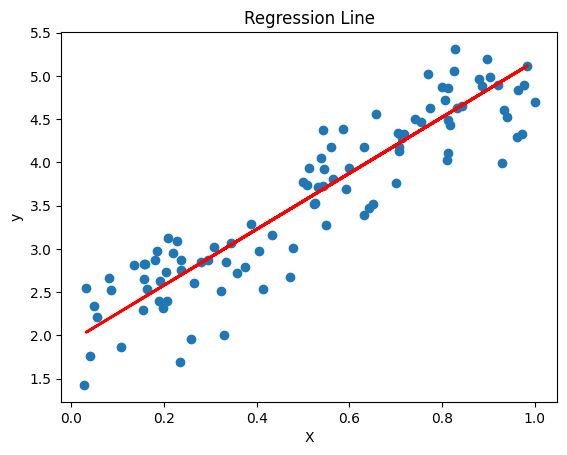

In [ ]:
#2. Plot the regression line over the data points.
plt.scatter(X,y)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line')
plt.show()

If we reduce the scale of the Gaussian noise, our synthetic data becomes "more linear", therefore the fit gets better and  𝑅2  gets closer to 1

In [ ]:
#EX2 Random Forest

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#1. Load the dataset sklearn.datasets.fetch california housingdataset which includes non-linear relation-ships.
data = fetch_california_housing(as_frame=True)
df = data.frame
X,y=data.data,data.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#2. Fit a Random Forest Regressor using sklearn.ensemble.RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#prediction
y_pred = model.predict(X_test)

In [ ]:
#Evaluate and compare

In [ ]:
#1. Compute and compare the MSE and R2 on training and testing sets.

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")


MSE: 0.26, R²: 0.80


In [ ]:
# Feature importance
importances = model.feature_importances_
for name, importance in zip(data.feature_names, importances):
    print(f"{name}: {importance:.2f}")

MedInc: 0.53
HouseAge: 0.06
AveRooms: 0.05
AveBedrms: 0.03
Population: 0.03
AveOccup: 0.14
Latitude: 0.08
Longitude: 0.08


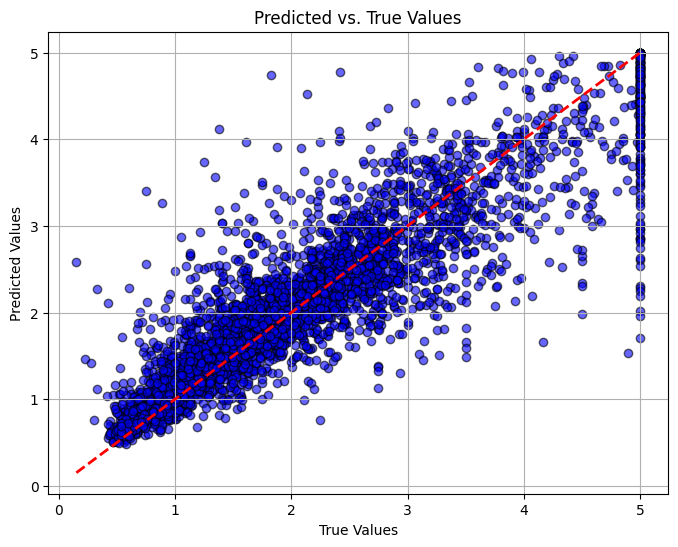

In [ ]:
#Plot again the predicted and true values.
# Plot predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. True Values")
plt.grid(True)
plt.show()

Exo 3

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = fetch_california_housing()

In [ ]:
X,y=data.data,data.target

In [ ]:
#train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Fit Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
gb_model.fit(X_train, y_train)
# Predictions
y_pred = gb_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
importances = gb_model.feature_importances_
feature_names = data.feature_names
print("Feature Importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.2f}")


Mean Squared Error: 0.22
R-squared: 0.83
Feature Importances:
MedInc: 0.52
HouseAge: 0.05
AveRooms: 0.04
AveBedrms: 0.03
Population: 0.03
AveOccup: 0.13
Latitude: 0.10
Longitude: 0.10
